In [1]:
import pandas as pd
import cufflinks as cf
import numpy as np
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

cf.set_config_file(theme='pearl', world_readable=False)
cf.go_offline()

In [3]:
single_stock = yf.download('msft', start="2020-05-27", end="2021-05-27")

[*********************100%***********************]  1 of 1 completed


In [4]:
single_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-26,186.339996,186.500000,181.100006,181.570007,179.828796,36073600
2020-05-27,180.199997,181.990005,176.600006,181.809998,180.066498,39517100
2020-05-28,180.740005,184.149994,180.380005,181.399994,179.660416,33810200
2020-05-29,182.729996,184.270004,180.410004,183.250000,181.492691,42130400
2020-06-01,182.539993,183.000000,181.460007,182.830002,181.076721,22622400


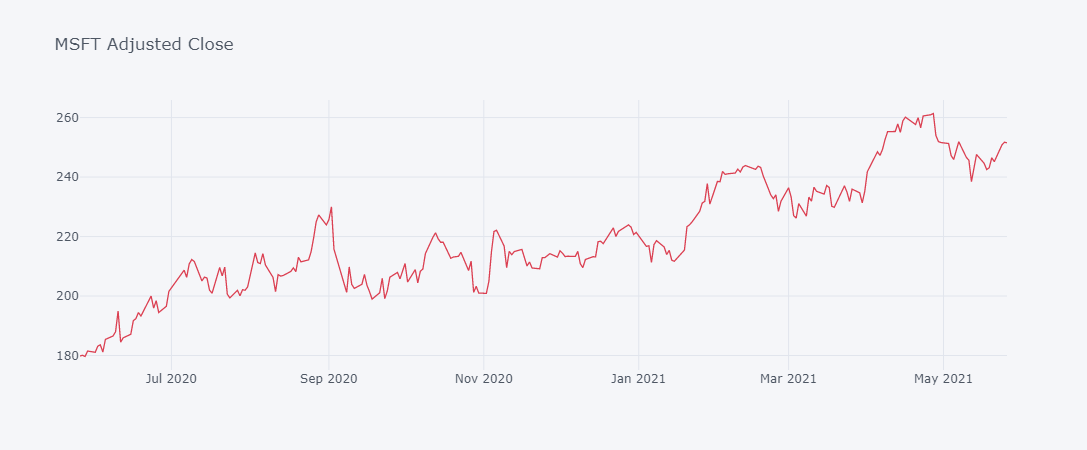

In [5]:
single_stock['Adj Close'].iplot(title='MSFT Adjusted Close', colors=['red'])

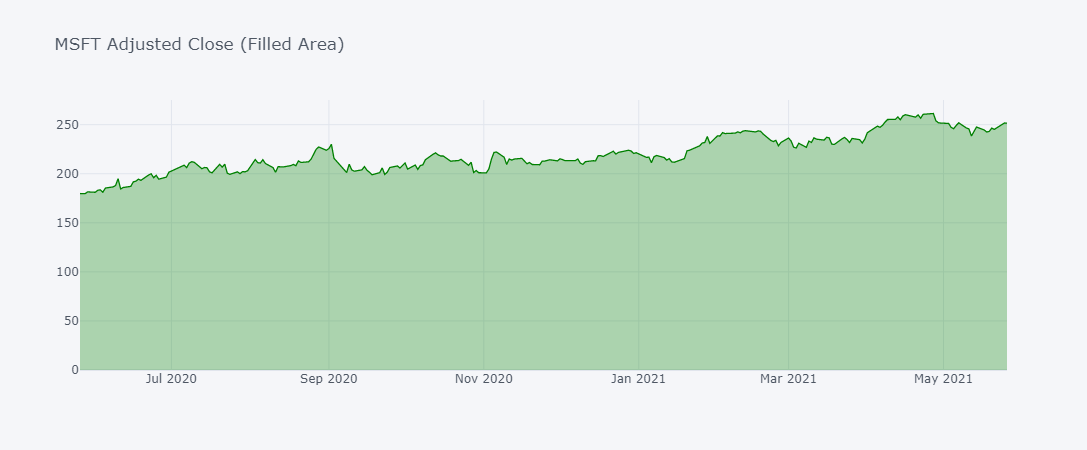

In [6]:
single_stock['Adj Close'].iplot(title='MSFT Adjusted Close (Filled Area)', fill=True,colors=['green'])

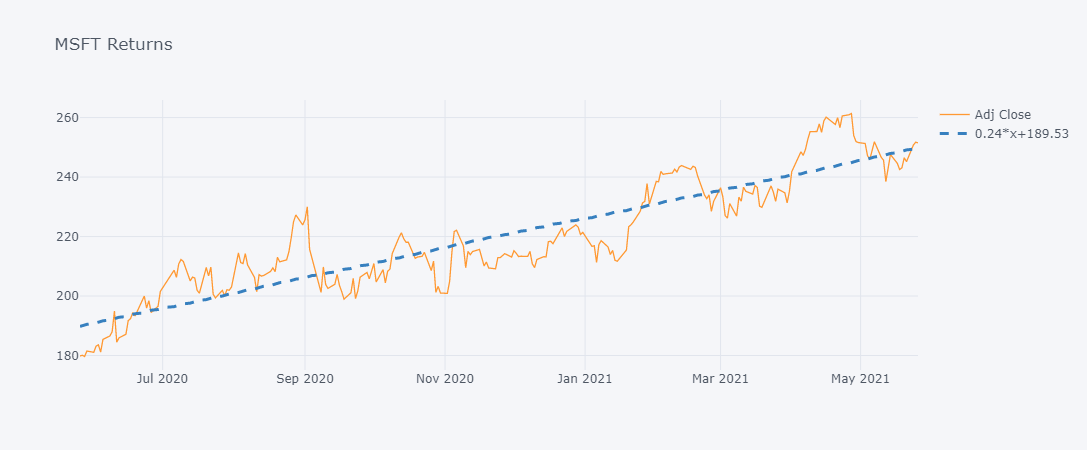

In [7]:
single_stock['Adj Close'].iplot(title='MSFT Returns',bestfit=True, bestfit_colors=['blue'])

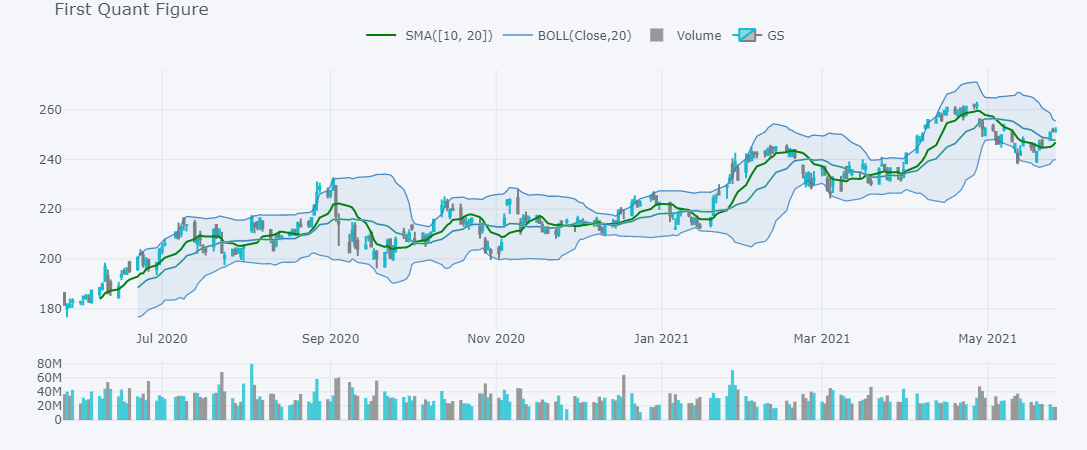

In [8]:
qf=cf.QuantFig(single_stock,title='First Quant Figure',legend='top',name='GS')
qf.add_sma([10,20],width=2,color=['green','lightgreen'],legendgroup=True)
qf.add_bollinger_bands()
qf.add_volume()
qf.iplot()

In [15]:
tickers = ['fb', 'jpm', 'msft', 'pg', 'tsla']
stock_data = yf.download(tickers, start="2020-05-27", end="2021-05-27")

[*********************100%***********************]  5 of 5 completed


In [16]:
stock_data.head()

Adj Close                                                 \
                    FB        JPM        MSFT          PG        TSLA   
Date                                                                    
2020-05-26  232.199997  92.803955  179.828796  109.349335  163.774002   
2020-05-27  229.139999  98.179268  180.066498  111.164833  164.046005   
2020-05-28  225.460007  96.716789  179.660416  113.282906  161.162003   
2020-05-29  225.089996  94.247055  181.492691  113.146255  167.000000   
2020-06-01  231.910004  95.496445  181.076721  114.444435  179.619995   

                 Close                                                  ...  \
                    FB         JPM        MSFT          PG        TSLA  ...   
Date                                                                    ...   
2020-05-26  232.199997   95.820000  181.570007  112.029999  163.774002  ...   
2020-05-27  229.139999  101.370003  181.809998  113.889999  164.046005  ...   
2020-05-28  225.460007   99.860001  181.399994  116.059998  161.162003  ...   
2020-05-29  225.089996   97.309998  183.250000  115.919998  167.000000  ...   
2020-06-01  231.910004   98.599998  182.830002  117.250000  179.619995  ...   

                  Open                                                  \
                    FB         JPM        MSFT          PG        TSLA   
Date                                                                     
2020-05-26  239.770004   92.889999  186.339996  114.150002  166.899994   
2020-05-27  229.070007  102.070000  180.199997  112.500000  164.171997   
2020-05-28  224.300003  102.940002  180.740005  115.529999  162.701996   
2020-05-29  225.199997   98.660004  182.729996  116.129997  161.750000   
2020-06-01  224.589996   97.750000  182.539993  116.000000  171.600006   

              Volume                                          
                  FB       JPM      MSFT        PG      TSLA  
Date                                                          
2020-05-26  33178300  41233900  36073600  10432400  40448500  
2020-05-27  34697600  39402000  39517100   8279700  57747500  
2020-05-28  29377200  24713900  33810200   6586700  36278000  
2020-05-29  23241500  26526400  42130400   7868000  58822500  
2020-06-01  18223800  15176800  22622400   5105600  74697500  

[5 rows x 30 columns]

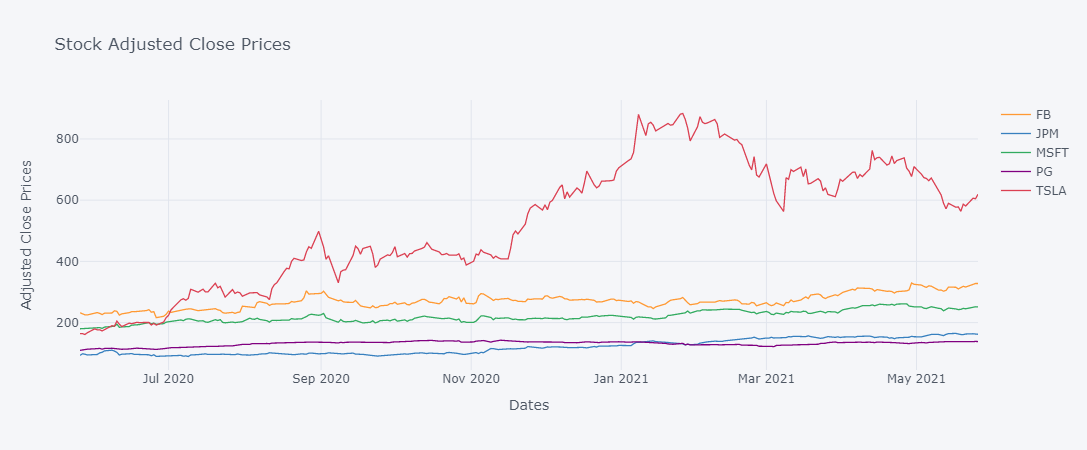

In [10]:
stock_data['Adj Close'].iplot(title='Stock Adjusted Close Prices', xTitle='Dates',yTitle='Adjusted Close Prices')

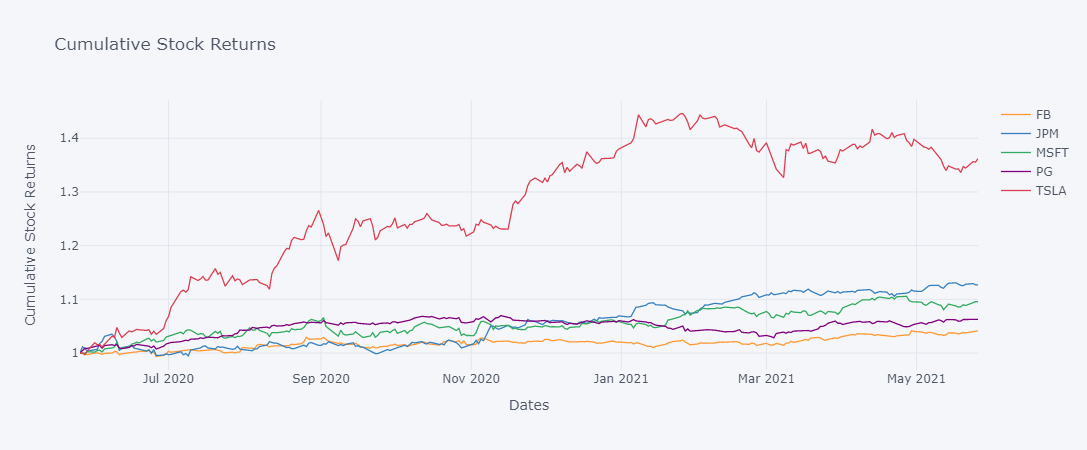

In [11]:
returns = stock_data['Adj Close'].pct_change()
returns.iloc[0,:] = 0
weights = np.array([0.1,0.2,0.25,0.25,0.2])
weighted_returns = weights * returns
cumulative_returns = (weighted_returns + 1).cumprod()
cumulative_returns.iplot(title='Cumulative Stock Returns', xTitle='Dates',yTitle='Cumulative Stock Returns')

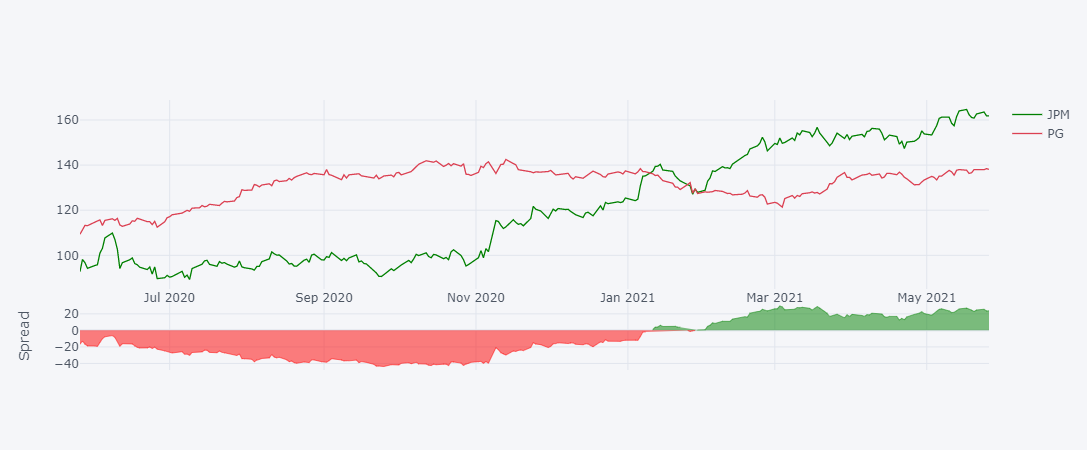

In [12]:
stock_data['Adj Close'][['JPM', 'PG']].iplot(kind='spread',colors=['green','red'])

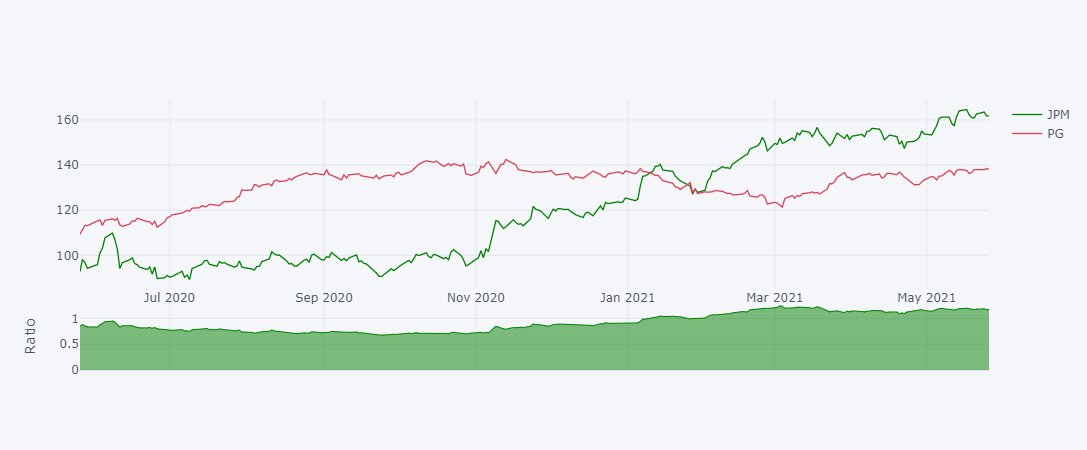

In [13]:
stock_data['Adj Close'][['JPM', 'PG']].iplot(kind='ratio',colors=['green','red'])